# Customer Segmentation using K Means Clustering

### Introduction

Customer Segmentation is one the most important applications of unsupervised learning. Using clustering techniques, companies can identify the several segments of customers allowing them to target the potential user base.
In this machine learning project, I have explored the data and noted the descriptive analysis of the data.
I have used <b>K-means clustering </b>, which is the essential algorithm for clustering unlabeled dataset.
To select the value for K, i have used elbow method and average silhouette_score method.

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import the dataset
data = pd.read_csv('Mall_Customers.csv')

### Data analysis

In [3]:
data.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Above Data includes customer id, gender, age, annual income(dollars in thousands) and spending score of each customer. 

In [4]:
main_data = data.copy()

In [5]:
#convert Annual income to thousands for better understanding 
data['Annual Income($)']= data['Annual Income (k$)']*1000
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income($)
0,1,Male,19,15,39,15000
1,2,Male,21,15,81,15000
2,3,Female,20,16,6,16000
3,4,Female,23,16,77,16000
4,5,Female,31,17,40,17000


In [6]:
data.drop(columns = ['Annual Income (k$)', 'CustomerID'],inplace = True)

From the above dataset , dropped Annual Income(kdollars), another column Annual Income(dollars) was created. Even 'CustomerID' column was dropped for analysis purpose. CustomerID range from 1 to 200, i have assumed its a number assigned for each of the data collected. Also, Customer ID doesn't display any relation to buying capabilty of a customer. 

In [7]:
data.shape

(200, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Spending Score (1-100)    200 non-null int64
Annual Income($)          200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [9]:
data.describe(include = 'all').round()#Rounded the Decimal 

,Gender,Age,Spending Score (1-100),Annual Income($)
count,200,200.0,200.0,200.0
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,39.0,50.0,60560.0
std,NaN,14.0,26.0,26265.0
min,NaN,18.0,1.0,15000.0
25%,NaN,29.0,35.0,41500.0
50%,NaN,36.0,50.0,61500.0
75%,NaN,49.0,73.0,78000.0


In [10]:
#checking for null Values
data.isnull().sum()

Gender                    0
Age                       0
Spending Score (1-100)    0
Annual Income($)          0
dtype: int64

There are no Missing values in the data. Dataset has information of 200 customers, describing their gender, age, annual income and spending score (1-100). 

### Visualization of the Dataset

In [11]:
#Renaming data in Gender column for graphical representation
data['Gender'] = data['Gender'].replace("Female",1)
data['Gender'] = data['Gender'].replace("Male",0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002560B5D6BC8>,
      dtype=object)

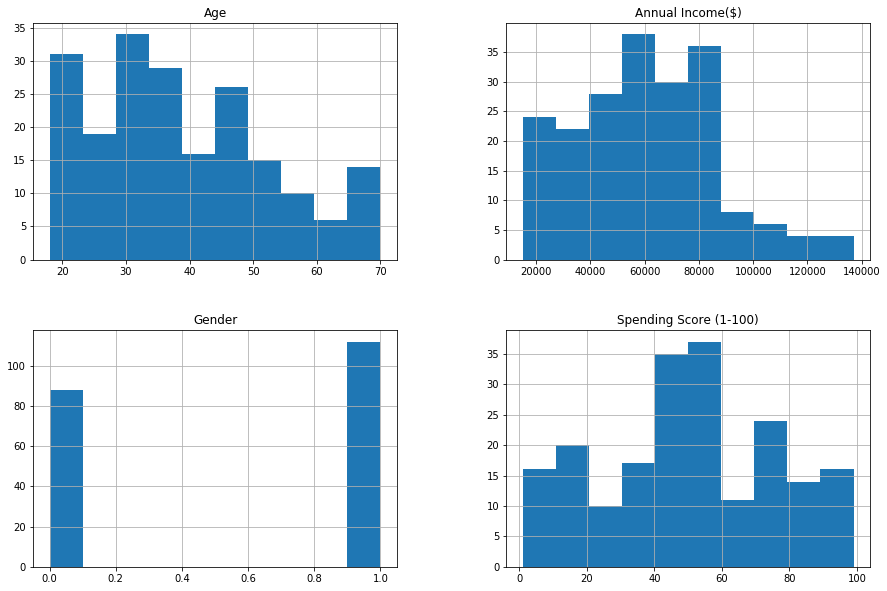

In [12]:
#Histogram plot of all the columns in data, to understand the range.
data.hist(figsize=(15, 10))

Above Histogram displays that there are no outliers in the dataset. Dataset has covered customer aging between 18-70years. Their income range is from 15k dollars to 137k dollars with a spending score between 1-100. We can conclude that the mall caters to the variety of customers with varying requirements. Let’s check each feature in detail to further analyze the data.

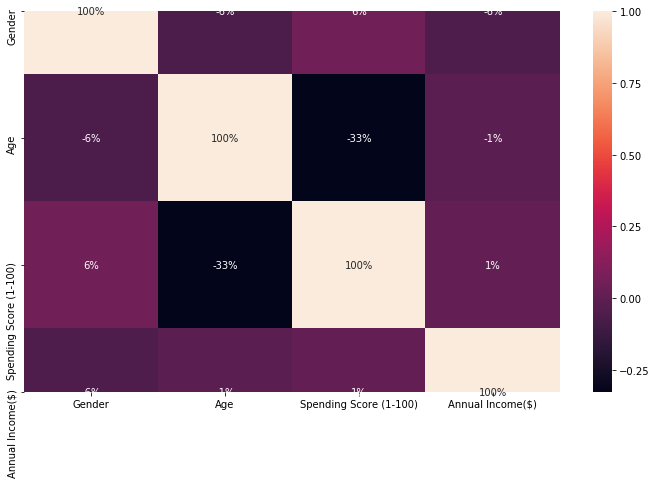

In [13]:
#correlation of the columns shown in percentage format
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot = True, fmt ='.0%')
plt.show()

The above heatmap shows the correlation between the different attributes of the "Mall Customer" dataset. We can clearly see that these attributes do not have positive correlation among them. There is max 6% correlation between gender and annual income. Age has negative correlation with all the other attributes in the dataset. Age and spending score seem to have a negative 33% correlation. All the attributes are independent features, that's why we will proceed with all of the features.

In [14]:
#Get a count of the number of mall customer genderwise
data['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Distribution of Customer - Genderwise')

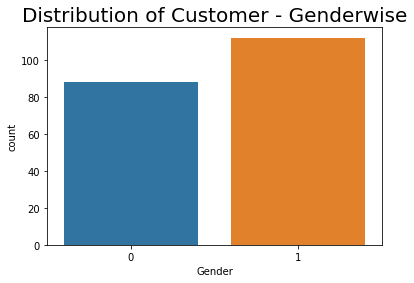

In [15]:
#Visulization Customer Type depending on Gender using countplot 
sns.countplot(data['Gender'])
plt.title('Distribution of Customer - Genderwise', fontsize = 20)

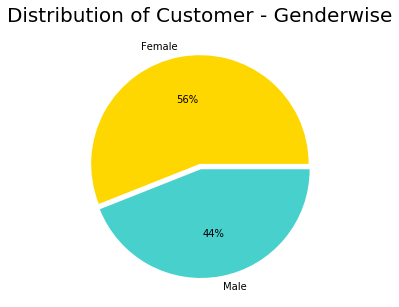

In [16]:
#Pie chart to understand the distribution of Customer
size = data['Gender'].value_counts()
labels = ["Female", "Male"]
colors = ['gold', 'mediumturquoise']
explode = [0, 0.05]

plt.figure(figsize=(10,5))
plt.pie(size, labels = labels, explode = explode,colors = colors, autopct = '%.0f%%')
plt.title('Distribution of Customer - Genderwise', fontsize = 20)
plt.show()

This data has more Female customers than Male. Even when we checked statistical information of the data,'Female' was listed as top appearing value with frequency of 112. It depends on how the data was collected. If it was first 200 customer who shopped at the mall, then we can infer that female shop more than male. However, if it is random 200 customer data then it will be a baised data with 56% female customer information. 

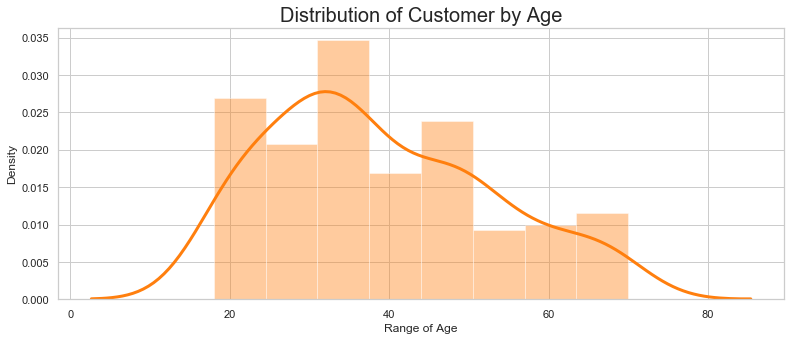

In [17]:
#Distribution of Customer by Age 
plt.figure(figsize=(13,5))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], kde = True,
                 kde_kws = {'linewidth': 3},color = '#ff7f0e')
plt.title('Distribution of Customer by Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Density')
plt.show()

In [18]:
female_data = data[(data["Gender"] == 1)]
# female_data.head()
male_data = data[(data["Gender"] == 0)]
# male_data.head()

Text(0.5, 1.0, 'Male Customer Age Distribution ')

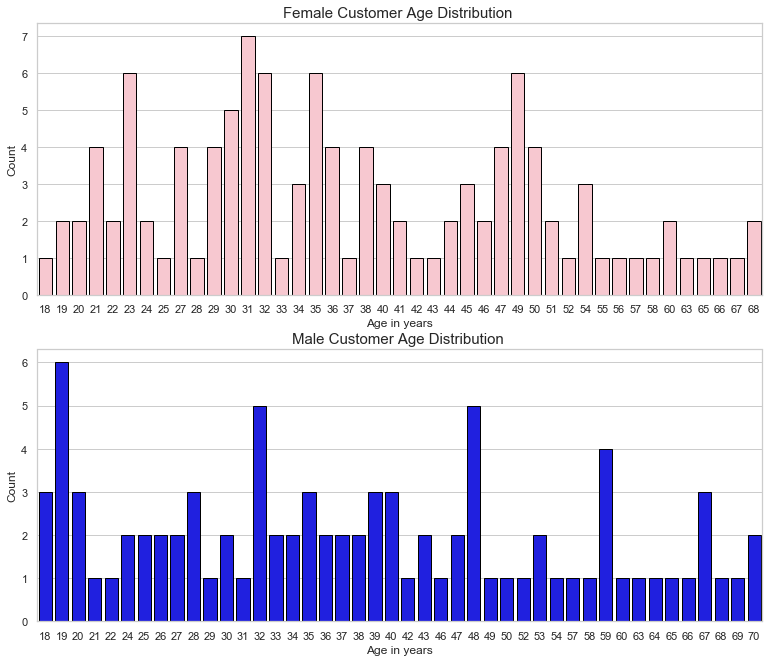

In [19]:
plt.figure(figsize=(13,11))
plt.subplot(2, 1, 1)
plt.title('Female Customer Age Distribution ',fontsize = 15)
sns.countplot(x= 'Age', data = female_data, color = "pink",edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Age in years')
plt.subplot(2, 1, 2)
sns.countplot(x= 'Age', data = male_data, color = "blue",edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Age in years')
plt.title('Male Customer Age Distribution ',fontsize = 15)

By looking at the above graph- there is no clear pattern, other than that the older age groups are less frequent to mall compared to customer between 30-50. Male customer tend to vist mall more till 20years of Age or when their more than 65years. However, female customer between 23-50years of age tend to be frequent mall visitor. Shopping Age range of a customer is quiet higher in female compared to male.

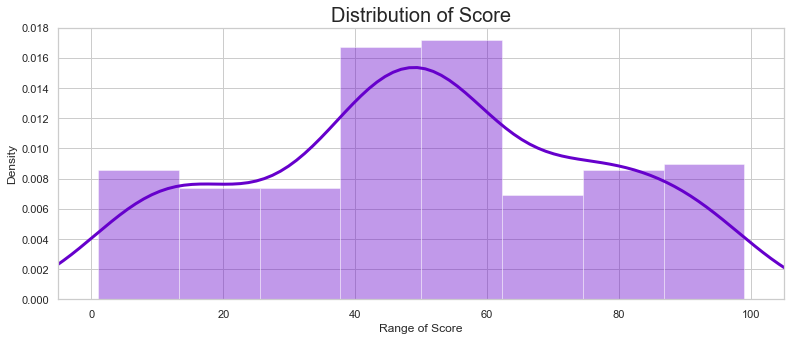

In [20]:
#Distribution of Customer by Age 
plt.figure(figsize=(13,5))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'], kde = True,
                 kde_kws = {'linewidth': 3},color = "#6600cc")
plt.xlim(-5, 105)
plt.title('Distribution of Score', fontsize = 20)
plt.xlabel('Range of Score')
plt.ylabel('Density')
plt.show()

We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. From the distribution graph, we conclude that customers between class 40 and 60 have the highest spending score among all the classes. 

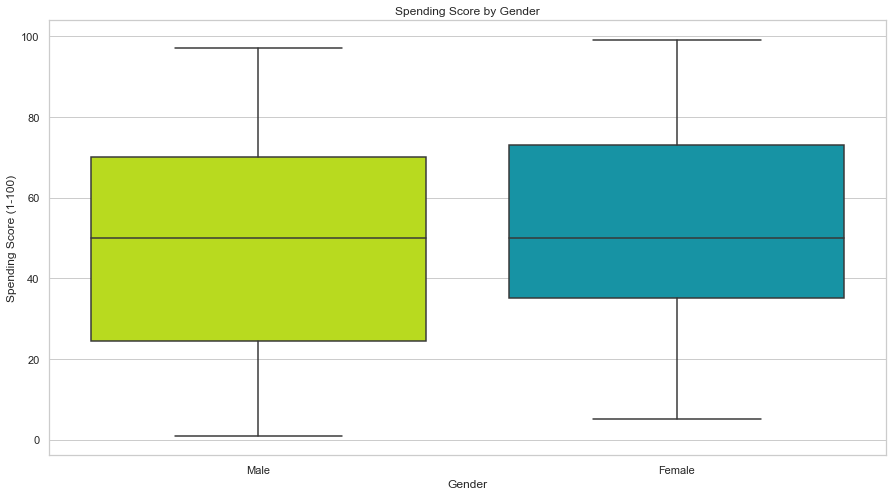

In [21]:
# Box Plot for Spending Score split by Gender:
plt.figure(figsize=(15,8))
sns.boxplot(data =main_data , x='Gender' , y='Spending Score (1-100)',palette = 'nipy_spectral_r')
plt.title('Spending Score by Gender')         
plt.show()

In terms of Spending Score, both genders have a median of 50. It seems that females' spending score is slightly higer. First Quartile for male customer is visibily lower than female customer. No. of male customer spending score above median score is less whereas,no.of female customer have more spending score above median score. We can conclude from this that at a given visit female customer are likely to spend more. 

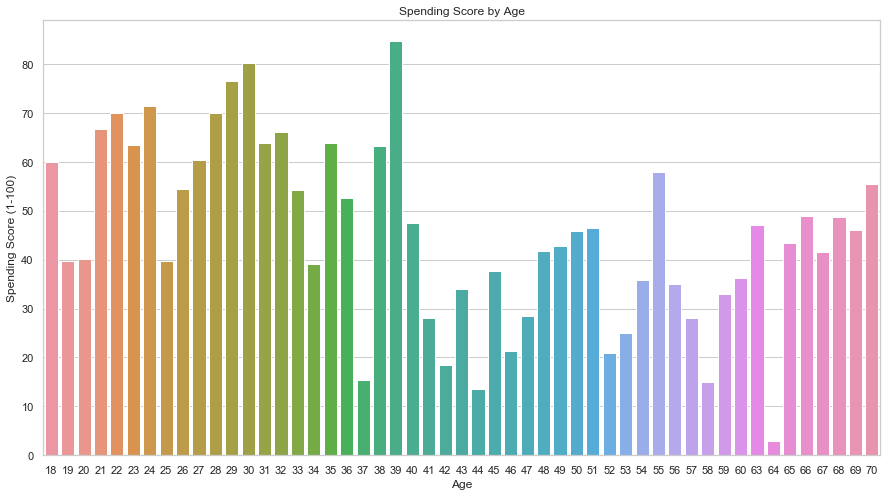

In [22]:
# Bar Plot for Spending Score split by Age:
plt.figure(figsize=(15,8))
sns.barplot(data = main_data , x='Age' , y='Spending Score (1-100)',ci = None)
plt.title('Spending Score by Age')         
plt.show()

When we check spending score by age, we can notice that till 39yrs of age spending score is approximately 77% more than median spending score. After 40yrs, customer spending score drastically reduces. Between 40-70 yrs only 7% is more than median spending score. Mall can target younger customer as they tend to spend more.

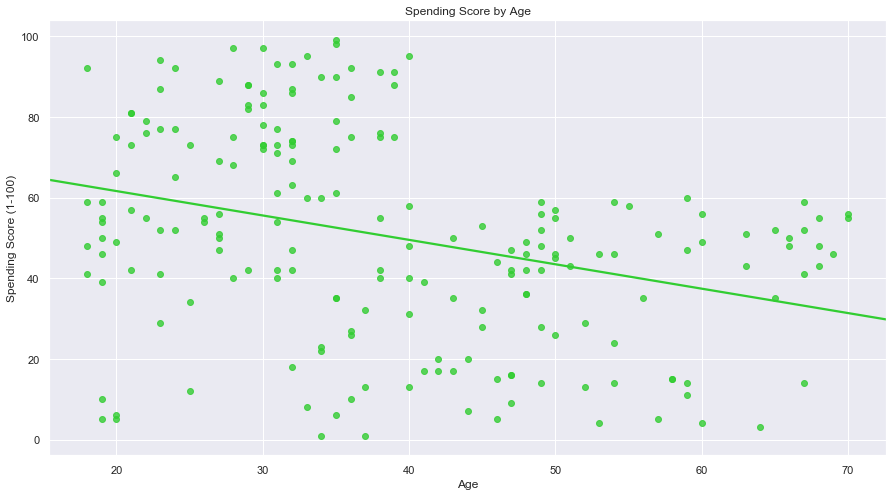

In [23]:
# Plot to show the relation between Spending Score and Age
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.regplot(data = main_data , x='Age' , y='Spending Score (1-100)',color = "limegreen",ci=None)
plt.title('Spending Score by Age')         
plt.show()

From the above plot we can clearly visualize that Spending Score is in negative Correlation with Age. When Age is minimum the Spending Score is closer to 65, wheareas at maximum age , spending score drops drastically to approximate 30. 

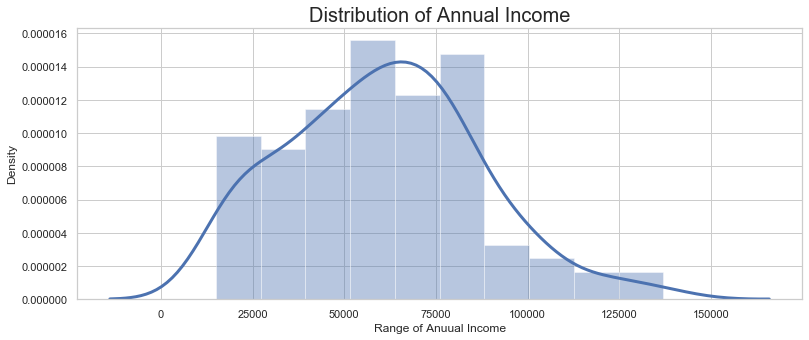

In [24]:
#Distribution of Customer by Age 
plt.figure(figsize=(13,5))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income($)'], kde = True,kde_kws = {'linewidth': 3})

plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Anuual Income')
plt.ylabel('Density')
plt.show()

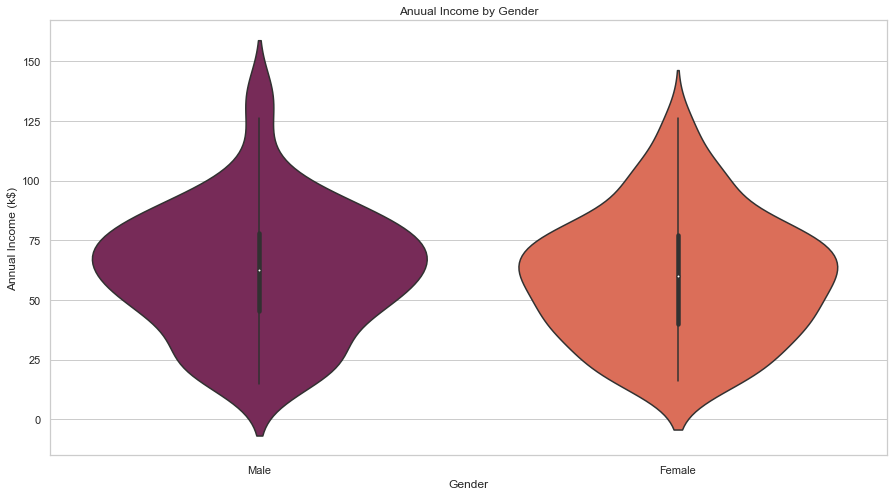

In [25]:
# Violin Plot for Anuual Income split by Gender:
plt.figure(figsize=(15,8))
sns.violinplot(data =main_data , x='Gender' , y="Annual Income (k$)",palette="rocket")
plt.title('Anuual Income by Gender')         
plt.show()

Both Male and Female Customer Anuual income is centered towards the median of 61500 $. In this dataset, max annual salary and min annual salary is both earned by male customer. However female customer have comparatively evenly spread salary range from median annual salary.

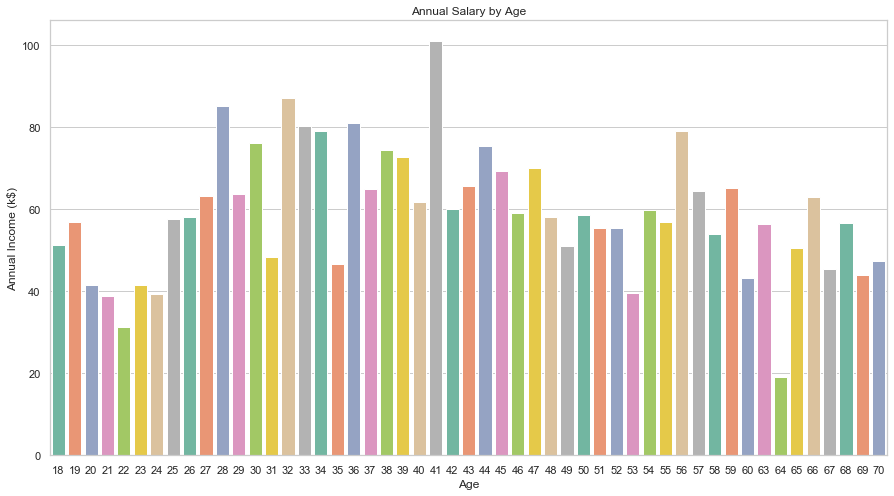

In [26]:
# Bar Plot for Spending Score split by Age:
plt.figure(figsize=(15,8))
sns.barplot(data = main_data , x='Age' , y="Annual Income (k$)",ci = None, palette = 'Set2')
plt.title('Annual Salary by Age')         
plt.show()

At 41years of Age Annual Income Salary is the highest. Out of total age range approx 39% earn more than 60000$. Majority of customers annual saralry is recorded between 30000 dollars to 60000 dollars. 

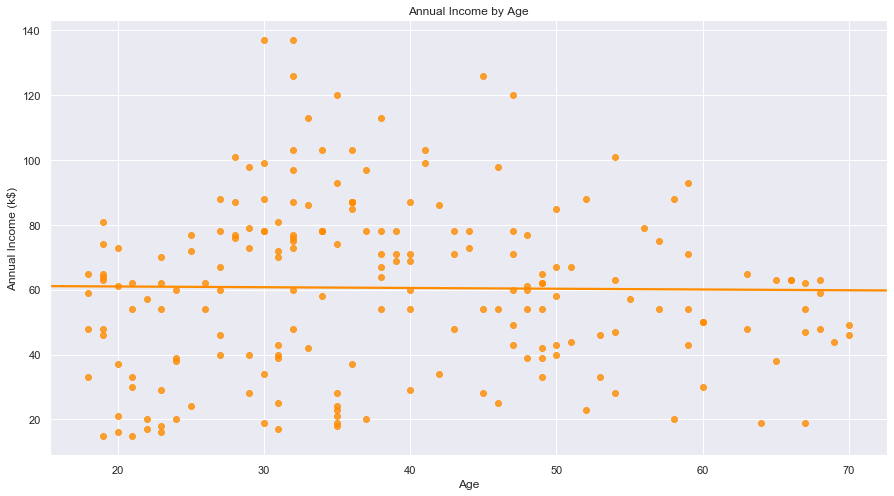

In [27]:
# Plot to show the relation between Anuual Income and Age
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.regplot(data = main_data , x='Age' , y="Annual Income (k$)",color = "darkorange",ci=None)
plt.title('Annual Income by Age')         
plt.show()

From the heat map we generated earlier in this notebook, age and annual income showed -1% correlation. Even from the above graph we can visualize same. The difference is very minimal in their annual earning for the minimum age and maximum age customer.

Text(26.591837557870377, 0.5, 'Annual Income ($)')

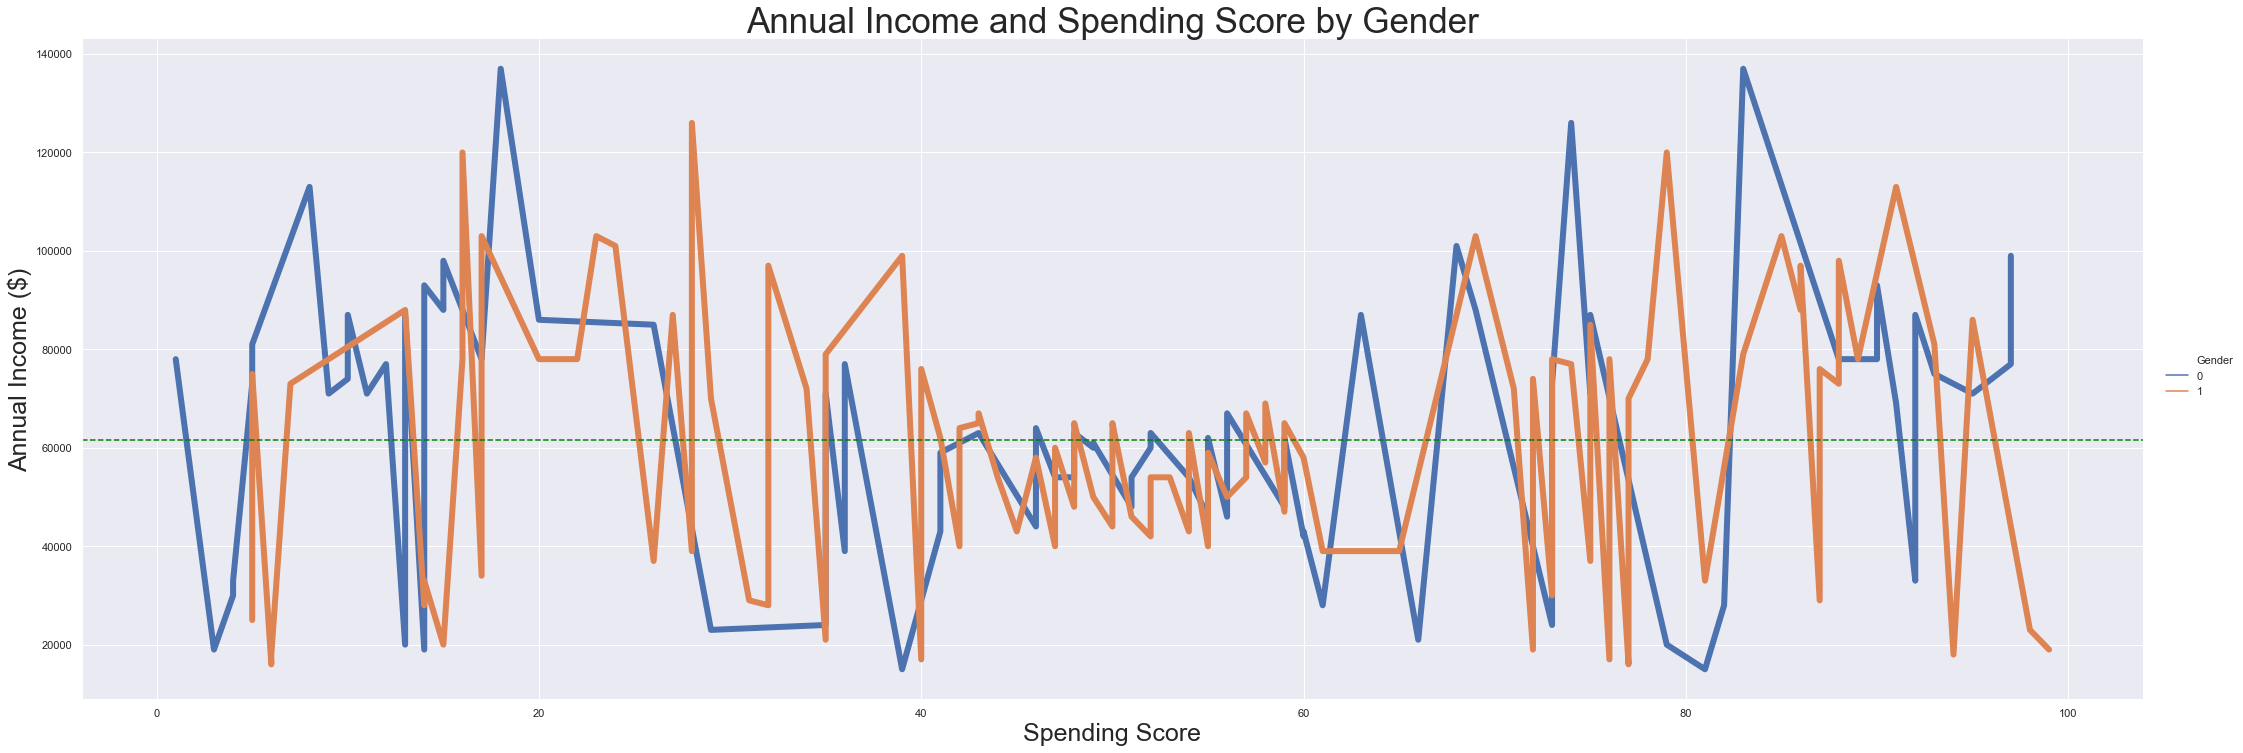

In [28]:
# Relation between Annual Income, Spending Score and Gender
sns.set(style = 'darkgrid')
sns.relplot(x="Spending Score (1-100)", y="Annual Income($)", hue = 'Gender',data= data, kind="line", height=10,
    aspect=3,estimator=None,linewidth=6)
plt.axhline(y=61500, color='green', linestyle='--', linewidth=1.5)
plt.title("Annual Income and Spending Score by Gender", fontsize=35)
plt.xlabel("Spending Score", fontsize=25)
plt.ylabel("Annual Income ($)", fontsize=25)

The above Plot Between Annual Income and Spending Score by gender. Green Dotted line is the median Annual Income at 61500dollars. We cannot clearly draw a relation between annual income and spending score. There are few customer with salary of more than 120000dollars yet their score is between 10-40. Also majority customer with spending score between 40-60, earn annual income less than the median annual salary.

### Conclusion of Data Analysis

Data for customer segmentation was obtained through membership cards of supermaket mall. However, its not clear whether 200 data info in this dataset was collected in order of their membership or if they are randomly selected. I have made an assumption that this data points are randomly selected and have analyzed on basis of same.

-	 Through the heatmap we can understand that all the four columns – Age, Gender, Annual income and Spending Score are independent features. 
- Data has been sorted as  per the Annual income of a customer. First 100 customers are below the average mean of Annual salary earned.
-	Data seem to be more female centric with 112 female  and 88 male customer information. No. of Female customers ranging from age 18 to 68years. There are 88 Male customer information ranging from 18 to 70years.
-	Annual Income and Spending Score don’t have direct correlation. Some customer with high annual income had low spending score.

<br>By enabling companies to target specific groups of customers, a customer segmentation model allows for the effective allocation of marketing resources and the maximization of cross- and up-selling opportunities. We will use K means clustering to find the targert customers on 2 criteria - Annual Income And Spending Score, Age and Spending Score. 


## KMeans Clustering


The k-means algorithm divides a set of samples into disjoint clusters, each described by the mean of the samples in the cluster.This algorithm requires the number of clusters to be specified. The KMeans algorithm, clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

To help determine optimal no. of clusters, there are two popular methods –

•	Elbow method<br>
•	Silhouette method

#### Selecting the number of clusters using Within Cluster Sum of Squares

<b> Elbow Method </b> <br>
The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. Depending on total variance for each clustering created, we can determine the best k value.

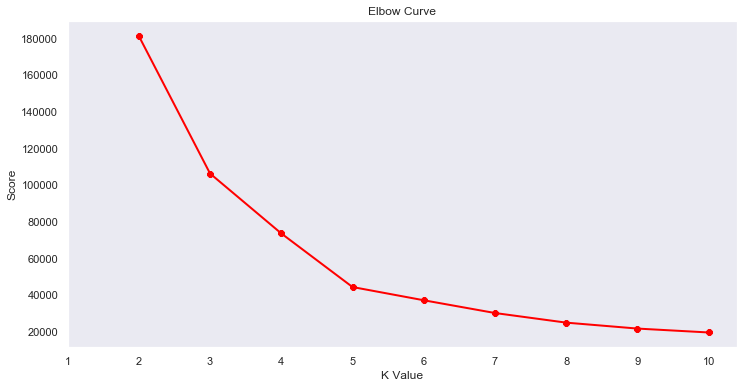

In [29]:
# Clustering based on Annual Income and Spending Score
from sklearn.cluster import KMeans
X=main_data.iloc[:, [3,4]].values
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()

The inertia or within cluster sum of squares is not a good performance metric when trying to choose k because it keeps getting lower as we increase k. As we can see, the inertia drops very quickly as we increase k up to 5, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm and we can consider point at k=5 to be an 'elbow'. It's not actually 100% clear what point the 'elbow' is.

So 4,5 or 6 would be a good choice for number of clusters. Lower values would be dramatic and going for higher values would not be much help, as we might be splitting perfectly good clusters in half for no good reason.

#### Selecting the number of clusters using silhouette_score

<b> Silhouette score Method </b><br>
Silhouette score is considered to be a more precise approach than 'elbow method'.Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. 

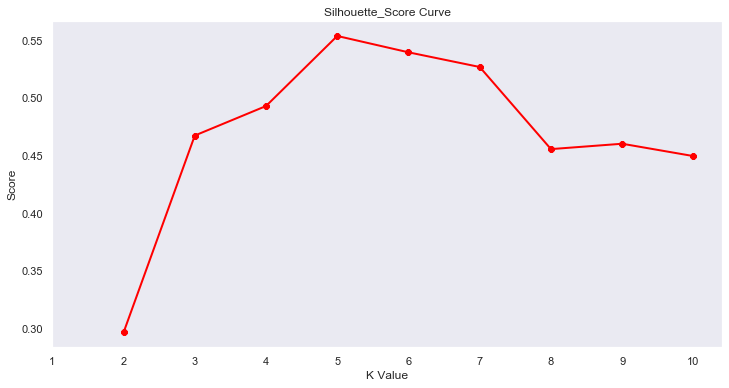

In [30]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
m = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state = 123)
    k_means = kmeans.fit(X)  
    labels = k_means.labels_
    sil_coeff = metrics.silhouette_score(X, labels,metric='euclidean')
    m.append(sil_coeff)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,11),m, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Score")
plt.title('Silhouette_Score Curve')
plt.show()

As we can see this visualisation is much clearer than the elbow method. The silhouette plot shows that the n_clusters value of 2,3,4,8, 9and 10 are a bad pick for the given data.  It just confirms that 5 is a good choice for a number of clusters.

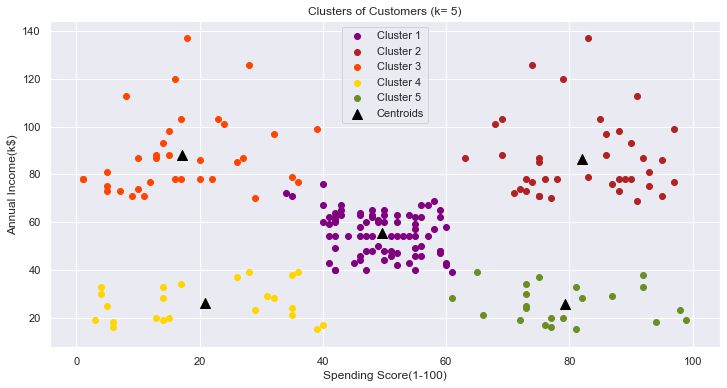

In [31]:
#Applying k-means algorithm to the X dataset
kmeans= KMeans(n_clusters = 5,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123)
#fit predict method = Returns cluster in which each observation belongs to.
y_kmeans = kmeans.fit_predict(X)

#Visualising the clusters
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.scatter(X[y_kmeans==0, 1], X[y_kmeans==0, 0],label ='Cluster 1',  c='purple' )
plt.scatter(X[y_kmeans==1, 1], X[y_kmeans==1, 0],  c='firebrick', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 1], X[y_kmeans==2, 0],  c='orangered', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 1], X[y_kmeans==3, 0],  c='gold', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 1], X[y_kmeans==4, 0],  c='olivedrab', label ='Cluster 5')
#Plot the centroid. 
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='black',marker = '^' ,label = 'Centroids',s = 100)
plt.title('Clusters of Customers (k= 5)')
plt.ylabel('Annual Income(k$)')
plt.xlabel('Spending Score(1-100)')
plt.legend()
plt.show()

The data(clusters) are plotted on a spending score Vs annual income curve. We can see that the mall customers can be broadly grouped into 5 groups based on their purchases made in the mall.

- In cluster 4(gold colored) we can see people have low annual income and low spending scores. The mall will be less interested in people belonging to this cluster.
- In cluster 5(olive colored) we can see that people have low income but higher spending scores. The malls might not target these people that effectively but still will not lose them.
- In cluster 1(purple colored) we see that people have average income and an average spending score, these people can be persuaded into spending more with different adverstisement or offer deisgned for them.
- In cluster 3(orangered colored) we see that people have high income but low spending scores. As their spending capacity is high, they can become loyal customers at the mall, if proper customer service strategy are planned.
- In cluster 2(firebrick colored) we see that people have high income and high spending scores.The mall authorities can add new facilities so that they can attract these people and use their spending capacity to maximum.

Finally, based on our machine learning technique we may deduce that each segement of customer has to be differently approached. Cluster3 customers can become potiential buyers. Cluster 1 currently have good spending score, retaining these customer should be the strategy for them. Cluster 2,5 all have high spending score with different income range, mall can take efforts to increase their spending score by special offers. Cluster 4 customers have both low annual income and low spending score. If they are targeted by special offer on essentials, their spending score can be increased.

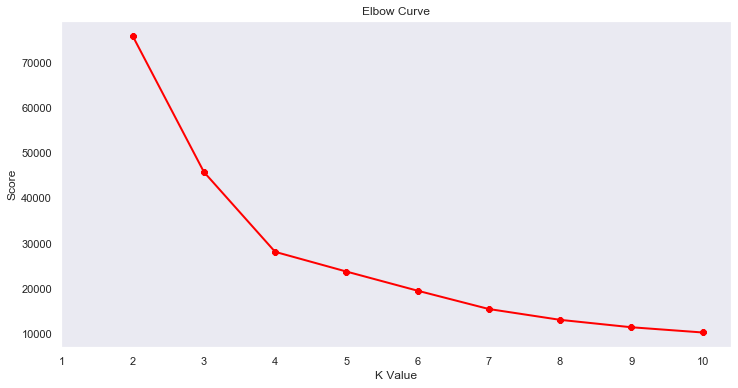

In [32]:
# Clustering based on Age
X=main_data.iloc[:, [2,4]].values
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()


After K= 4 point, the distortion/inertia start decreasing in a linear fashion. Thus, i the plot above the elbow is at k=4 indicating the optimal k for this dataset when divided by age is 4.

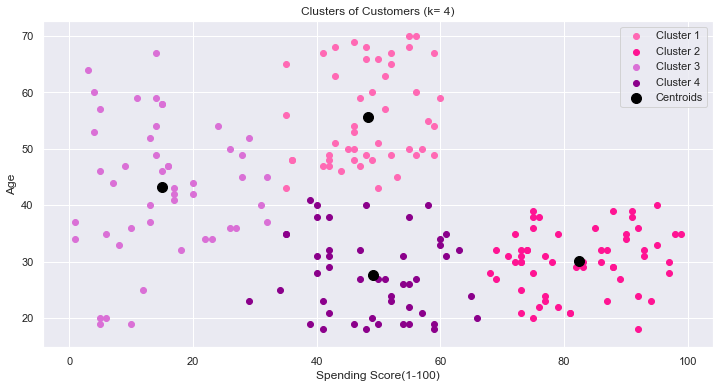

In [33]:
#Applying k-means algorithm to the X dataset
kmeans= KMeans(n_clusters = 4,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123)
#fit predict method = Returns cluster in which each observation belongs to.
y_kmeans = kmeans.fit_predict(X)

#Visualising the clusters
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.scatter(X[y_kmeans==0, 1], X[y_kmeans==0, 0],label ='Cluster 1',  c='hotpink' )
plt.scatter(X[y_kmeans==1, 1], X[y_kmeans==1, 0],  c='deeppink', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 1], X[y_kmeans==2, 0],  c='orchid', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 1], X[y_kmeans==3, 0],  c='darkmagenta', label ='Cluster 4')
#Plot the centroid. 
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='black',marker = 'o' ,label = 'Centroids',s = 100)
plt.title('Clusters of Customers (k= 4)')
plt.ylabel('Age')
plt.xlabel('Spending Score(1-100)')
plt.legend()
plt.show()

Age is also another common factor used to segment customers. It’s often paired with gender to create a more robust profile.

- In cluster 3(orchid colored) we can see customer from young to old with low spending score. The mall need to have concrete advertisment to this group as most of the customer are matured customer between age 40-50.
- In cluster 2(deeppink colored) we can see that people are mostly below 40yrs of age with high spending scores. The malls need to have more flashy and eye catching advertisment. These age group of people are generally more impressionable.
- In cluster 4(darkmagenta colored) we see that people are also mostly under 40yrs of age but with an average spending score, these people can be persuaded into spending more with different adverstisement or offer deisgned for them. They are more cautious buyer. 
- In cluster 1(hotpink colored) we see that people are older, between 50-70 with average spending scores. These customers are more traditional and sorted buyers. Its hard to persuade them through advertisment. Different options , new trends can seem more appealing to them.

Age is also helpful when deciding which social platform you want to use. Every social media platform has an age group that uses it more than others.Depending on the targeted customer, mall can spend their advertising and marketing budget more efficiently. 

Customer segmentation based on demographic information (Age, gender, income, spending score) is one way to categorize. However, other types of segmentation such as behavioral, psychographic,geographic can help to build a better persona of your ideal buyer. Mall authorities can craft clear messages that work every time after considering all the attributes effecting the purchasing ability of the customer.

#### The dataset
The dataset we will study in this project has been collected from Kaggle (https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python). It contains demographic information such as CustomerID, Age, Gender, Annual Income and Spending Score. Below is some more information on each feature:
Here we have the following features :
1. CustomerID: It is the unique ID given to a customer
2. Gender: Gender of the customer
3. Age: The age of the customer
4. Annual Income(k): It is the annual income of the customer
5. Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

#### The goal 
In this project is to apply K means Clustering algorithm and to cluster unlabeled data into k clusters. One of the trickier tasks in clustering is identifying the appropriate number of clusters k.To estimate the value of k, I have used elbow method and silhouette score method.